import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
# Imports

## Libraries

In [1]:
import random
import warnings
warnings.filterwarnings('ignore')
from functions import *
import seaborn as sns

## Data

In [2]:
original_df = pd.read_csv("../my_saved_data/all_correct_restaurants.csv", index_col=0)
# original_df.shape

In [3]:
rest_df = pd.read_csv("../my_saved_data/all_correct_restaurants_and_regions.csv", index_col=0)
# 282 more restaurants in this version than last one! 
# rest_df.shape[0]

In [4]:
with open("../my_saved_data/demonym_dictionary.pickle", "rb+") as f:
    demonym_dict = pickle.load(f)

### Checking differences between the original data set and the new data set 
(March 2)

In [5]:
# how many restaurants in total 
print(f"The original dataset had {rest_df.shape[0] - original_df.shape[0]} fewer matches than this one")

The original dataset had 282 fewer matches than this one


In [6]:
original_dataset_groupby = original_df.groupby("City").count()
rest_df_groupby = rest_df.groupby("City").count()

In [7]:
original_df_values = original_dataset_groupby['Match'].values
rest_df_values = rest_df_groupby['Restaurant'].values

In [8]:
value_differences = rest_df_values - original_df_values
for idx, item in enumerate(value_differences):
    print(f"{original_dataset_groupby.index[idx]} had {item} more values ({round(item / original_df_values[idx], 2) * 100}%) in the new iteration of this project than the old one.")

Chicago had 253 more values (5060.0%) in the new iteration of this project than the old one.
Dallas had 16 more values (16.0%) in the new iteration of this project than the old one.
NYC had 11 more values (16.0%) in the new iteration of this project than the old one.
SF had 2 more values (15.0%) in the new iteration of this project than the old one.


### Visualizing the difference in the number of restaurants found for each city

In [9]:
original_df_values

array([ 5, 97, 69, 13])

In [10]:
rest_df_groupby

,Restaurant,Matched_word,Final_region
City,,,
Chi,258,258,258
Dal,113,113,113
NYC,80,80,80
SF,15,15,15


In [11]:
names_of_rest_list = list(rest_df_groupby.index)
# rest_df_groupby.keys()

In [12]:
count_of_restaurants_combined = list(zip(names_of_rest_list, original_df_values, rest_df_values))

In [13]:
count_of_restaurants_combined

[('Chi', 5, 258), ('Dal', 97, 113), ('NYC', 69, 80), ('SF', 13, 15)]

In [14]:
count_of_both_restaurants_df = pd.DataFrame(data = count_of_restaurants_combined,
                                           columns = ['City','First_version', 'Second_version'])

In [15]:
count_of_both_restaurants_df

,City,First_version,Second_version
0,Chi,5,258
1,Dal,97,113
2,NYC,69,80
3,SF,13,15


In [16]:
melted_count_of_both_restaurants_df = count_of_both_restaurants_df.melt(id_vars = ['City'],
                                                                       var_name = 'Version')

In [17]:
melted_count_of_both_restaurants_df

,City,Version,value
0,Chi,First_version,5
1,Dal,First_version,97
2,NYC,First_version,69
3,SF,First_version,13
4,Chi,Second_version,258
5,Dal,Second_version,113
6,NYC,Second_version,80
7,SF,Second_version,15


In [18]:
# count_of_both_restaurants_df.pivot(index='City', columns='First_version')

In [19]:
tips = sns.load_dataset("tips")
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


Text(0.5, 0, 'City')

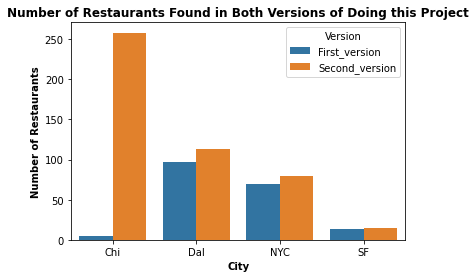

In [20]:
ax = sns.barplot(x = 'City', y = 'value', hue = 'Version',
           data = melted_count_of_both_restaurants_df)
ax.set_title('Number of Restaurants Found in Both Versions of Doing this Project', 
             fontsize='large', fontweight='bold')
ax.set_ylabel("Number of Restaurants", fontweight='bold')
ax.set_xlabel("City", fontweight='bold')
# plt.savefig("../my_saved_data/Number_of_restaurants_found_in_both_versions.png", bbox_inches='tight')

# Data Collection

## Count of Restaurants for each city

In [21]:
rest_count_dict = {}
rest_count_dict['Chicago'] = len(rest_df[rest_df['City'] == 'Chi'])
rest_count_dict['Dallas'] = len(rest_df[rest_df['City'] == 'Dal'])
rest_count_dict['NYC'] = len(rest_df[rest_df['City'] == 'NYC'])
rest_count_dict['SF'] = len(rest_df[rest_df['City'] == 'SF'])

In [22]:
# chicago has many more because smaller types of businesses were also counted (paleterias, food trucks, etc.)
rest_count_dict

{'Chicago': 258, 'Dallas': 113, 'NYC': 80, 'SF': 15}

## Count of Regions for Each City

In [23]:
nyc_regions = count_regions_in_city("NYC", rest_df)
dal_regions = count_regions_in_city("Dal", rest_df)
sf_regions = count_regions_in_city("SF", rest_df)
chi_regions = count_regions_in_city("Chi", rest_df)

## Percent of restaurants representing a region for each city

In [24]:
regions = list(demonym_dict.keys())

In [25]:
pct_df = pd.DataFrame(data = regions, columns = ['Region'])

pct_df.sort_values(by = 'Region', inplace=True)
pct_df.reset_index(inplace=True, drop=True)

In [26]:
pct_df['NYC'] = add_regions_for_city_regions_count(nyc_regions, regions)
pct_df['Chi'] = add_regions_for_city_regions_count(chi_regions, regions)
pct_df['Dal'] = add_regions_for_city_regions_count(dal_regions, regions)
pct_df['SF'] = add_regions_for_city_regions_count(sf_regions, regions)

In [27]:
pct_df['NYC_pct'] = round(pct_df['NYC'] / sum(list(nyc_regions.values())), 2)
pct_df['Chi_pct'] = round(pct_df['Chi'] / sum(list(chi_regions.values())), 2)
pct_df['Dal_pct'] = round(pct_df['Dal'] / sum(list(dal_regions.values())), 2)
pct_df['SF_pct'] = round(pct_df['SF'] / sum(list(sf_regions.values())), 2)

## Most prevalent regions for each city

In [28]:
pct_df.sort_values(by=['NYC_pct'], ascending=False)[0:5]

,Region,NYC,Chi,Dal,SF,NYC_pct,Chi_pct,Dal_pct,SF_pct
20,Puebla,37,12,3,0,0.46,0.05,0.03,0.00
19,Oaxaca,5,4,2,1,0.06,0.02,0.02,0.07
1,Baja California,5,0,1,0,0.06,0.00,0.01,0.00
16,Morelos,4,11,1,0,0.05,0.04,0.01,0.00
10,Guerrero,4,16,8,0,0.05,0.06,0.07,0.00


In [29]:
pct_df.sort_values(by=['Chi_pct'], ascending=False)[0:5]

,Region,NYC,Chi,Dal,SF,NYC_pct,Chi_pct,Dal_pct,SF_pct
15,Michoacan,0,69,35,0,0.00,0.27,0.31,0.00
12,Jalisco,2,49,2,2,0.02,0.19,0.02,0.13
17,Nayarit,0,15,2,0,0.00,0.06,0.02,0.00
10,Guerrero,4,16,8,0,0.05,0.06,0.07,0.00
20,Puebla,37,12,3,0,0.46,0.05,0.03,0.00


In [30]:
pct_df.sort_values(by=['Dal_pct'], ascending=False)[0:5]

,Region,NYC,Chi,Dal,SF,NYC_pct,Chi_pct,Dal_pct,SF_pct
15,Michoacan,0,69,35,0,0.00,0.27,0.31,0.00
18,Nuevo Leon,0,9,17,0,0.00,0.03,0.15,0.00
9,Guanajuato,2,11,10,2,0.02,0.04,0.09,0.13
10,Guerrero,4,16,8,0,0.05,0.06,0.07,0.00
5,Chihuahua,4,5,4,3,0.05,0.02,0.04,0.20


In [31]:
pct_df.sort_values(by=['SF_pct'], ascending=False)[0:5]

,Region,NYC,Chi,Dal,SF,NYC_pct,Chi_pct,Dal_pct,SF_pct
5,Chihuahua,4,5,4,3,0.05,0.02,0.04,0.20
25,Sonora,1,2,0,2,0.01,0.01,0.00,0.13
9,Guanajuato,2,11,10,2,0.02,0.04,0.09,0.13
12,Jalisco,2,49,2,2,0.02,0.19,0.02,0.13
22,Quintana Roo,1,1,0,1,0.01,0.00,0.00,0.07


## Regions That are Over 20% of a city's mex restaurants 

In [32]:
over_20_regions = []
for idx, x in enumerate(pct_df['Region']):
    for col in pct_df.columns[-4:]:
        if pct_df[col][idx] >= 0.20:
            if x not in over_20_regions:
                over_20_regions.append(x)
over_20_regions

['Chihuahua', 'Michoacan', 'Puebla']

In [33]:
over_20_df = pct_df[pct_df['Region'].isin(over_20_regions)][['Region',"Chi_pct", "Dal_pct", 'NYC_pct', "SF_pct"]]

## Saving Data 

In [34]:
# pct_df.to_csv("../my_saved_data/new_corrected_pct_df.csv")
# over_20_df.to_csv("../my_saved_data/regions_over_20_pct_of_city.csv")

# Culinary Regions of Mexico

## Adding Culinary Regions to DataFrame

In [35]:
region_to_cul_region = {}
for key, value in cul_reg_dict.items():
    for item in value:
        region_to_cul_region[item] = key

In [36]:
rest_df['Culinary_region'] = rest_df['Final_region'].replace(region_to_cul_region)

## Grouping Culinary Regions Together

In [37]:
orig_super_region_df = rest_df.groupby('Culinary_region').count()

In [38]:
super_region_df = orig_super_region_df[['Restaurant']]
super_region_df['Percentage'] = round(super_region_df['Restaurant'] / rest_df.shape[0], 2)

In [39]:
super_region_df

,Restaurant,Percentage
Culinary_region,,
Bajio,141,0.30
Central,99,0.21
Gulf,14,0.03
North,81,0.17
North Pacific Coast,76,0.16
South,11,0.02
South Pacific Coast,44,0.09


## Grouping by Cities and Culinary Regions

In [40]:
region_to_cul_reg_dict = {}
for key, value in cul_reg_dict.items():
    for item in value:
        region_to_cul_reg_dict[item] = key
# cul_reg_dict

In [41]:
pct_df['Cul_reg'] = pct_df['Region'].replace(region_to_cul_reg_dict)
pct_df.drop(columns = pct_df.columns[1:5], inplace=True)
# region_to_cul_reg_dict

In [42]:
city_w_cul_reg_pct = pct_df.groupby("Cul_reg").sum()

In [43]:
city_w_cul_reg_pct

,NYC_pct,Chi_pct,Dal_pct,SF_pct
Cul_reg,,,,
Bajio,0.04,0.33,0.44,0.20
Central,0.57,0.15,0.14,0.00
Gulf,0.05,0.02,0.03,0.00
North,0.13,0.13,0.25,0.40
North Pacific Coast,0.03,0.25,0.06,0.20
South,0.01,0.01,0.03,0.14
South Pacific Coast,0.12,0.09,0.09,0.07


# Finding Uniqueness of each city's Mexican Food

In [55]:
# we didn't do San Francisco because the number of regions represented is very small
## From this, we see that Chicago is the most diverse city
num_chi_rand_reg, num_chi_rand_cul_reg = get_5_samples_of_rand_regions('Chi', rest_df)
num_dal_rand_reg, num_dal_rand_cul_reg = get_5_samples_of_rand_regions('Dal', rest_df)
num_nyc_rand_reg, num_nyc_rand_cul_reg = get_5_samples_of_rand_regions('NYC', rest_df)

The mean number of regions is 6.6 and the mean number of culinary_regions is 4.6
The mean number of regions is 6.4 and the mean number of culinary_regions is 3.8
The mean number of regions is 6.0 and the mean number of culinary_regions is 4.6


# Saving Data

In [51]:
# rest_df.to_csv("../my_saved_data/final_correct_restaurants_and_regions.csv")

In [52]:
# pct_df.to_csv("../my_saved_data/city_region_pct_df.csv")

In [53]:
# city_w_cul_reg_pct.to_csv("../my_saved_data/city_w_culinary_region_pct.csv")

In [54]:
# super_region_df.to_csv("../my_saved_data/culinary_region_pct_overal.csv")